In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import style

In [91]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# read in csv file

In [92]:
ms = pd.read_csv(r'C:\Users\Manjuprasad\Desktop\Bharat_intern\CSV.csv')

In [93]:
ms

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-06,40.930000,41.560001,40.220001,41.369999,40.720413,88000
1,2022-06-07,40.990002,41.939999,40.990002,41.889999,41.232250,70100
2,2022-06-08,41.709999,41.880001,40.919998,41.099998,40.454655,90900
3,2022-06-09,40.660000,41.330002,40.110001,40.919998,40.277477,139300
4,2022-06-10,40.259998,40.259998,39.099998,39.570000,38.948681,155600
...,...,...,...,...,...,...,...
246,2023-05-30,26.750000,26.930000,26.530001,26.540001,26.540001,51300
247,2023-05-31,26.549999,26.549999,25.860001,26.160000,26.160000,102600
248,2023-06-01,26.260000,26.270000,25.440001,25.490000,25.490000,56500
249,2023-06-02,25.790001,26.820000,25.709999,26.790001,26.790001,89700


In [94]:
ms['Date']

0      2022-06-06
1      2022-06-07
2      2022-06-08
3      2022-06-09
4      2022-06-10
          ...    
246    2023-05-30
247    2023-05-31
248    2023-06-01
249    2023-06-02
250    2023-06-05
Name: Date, Length: 251, dtype: object

# remove the first row of dataset in order to make 'date' be the index

In [95]:
ms = ms.drop(0)

In [96]:
ms['Date'] =  pd.to_datetime(ms['Date'])

In [97]:
ms = ms.set_index('Date')

In [98]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-07,40.990002,41.939999,40.990002,41.889999,41.232250,70100
2022-06-08,41.709999,41.880001,40.919998,41.099998,40.454655,90900
2022-06-09,40.660000,41.330002,40.110001,40.919998,40.277477,139300
2022-06-10,40.259998,40.259998,39.099998,39.570000,38.948681,155600
2022-06-13,38.869999,38.869999,37.090000,37.340000,36.753696,180500


In [99]:
ms.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-30,26.750000,26.930000,26.530001,26.540001,26.540001,51300
2023-05-31,26.549999,26.549999,25.860001,26.160000,26.160000,102600
2023-06-01,26.260000,26.270000,25.440001,25.490000,25.490000,56500
2023-06-02,25.790001,26.820000,25.709999,26.790001,26.790001,89700
2023-06-05,26.540001,26.549999,25.950001,26.120001,26.120001,51000


# draw the diagram of the close price of stock from 2008 to 2018

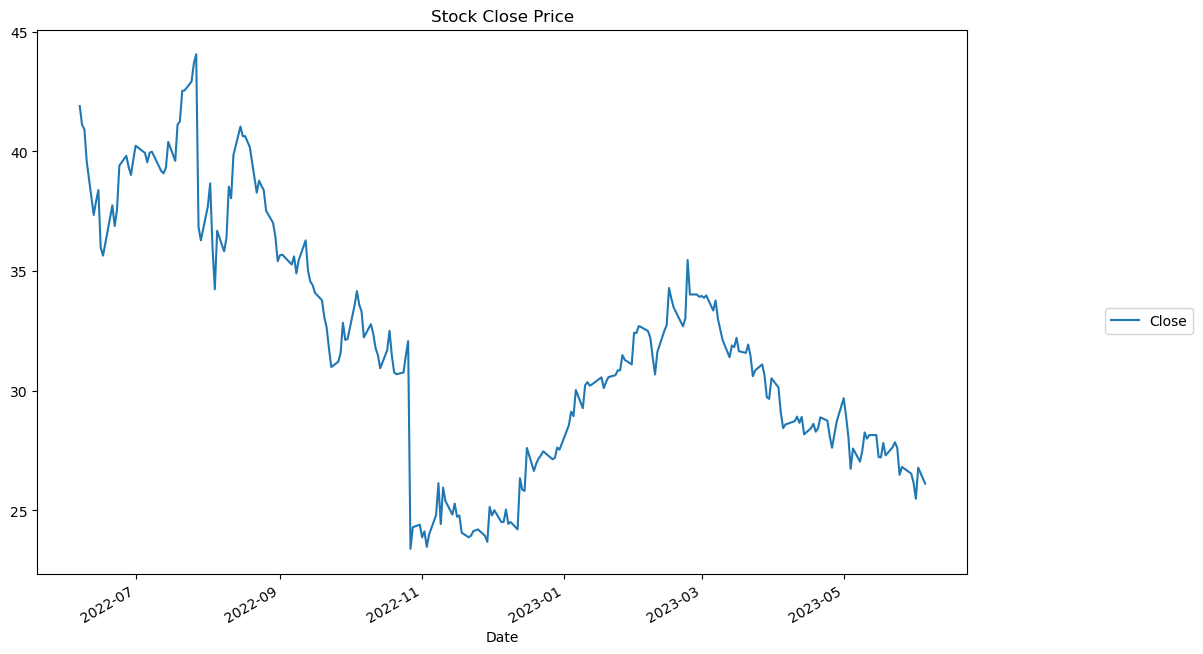

In [100]:
ms['Close'].plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Stock Close Price")
plt.show()

# Resample time series in pandas to a weekly interval

In [101]:
stock_week = ms['Close'].resample('W-MON').mean()

In [102]:
stock_train = stock_week['2022':'2023']

# Diagram of stock price in 2018

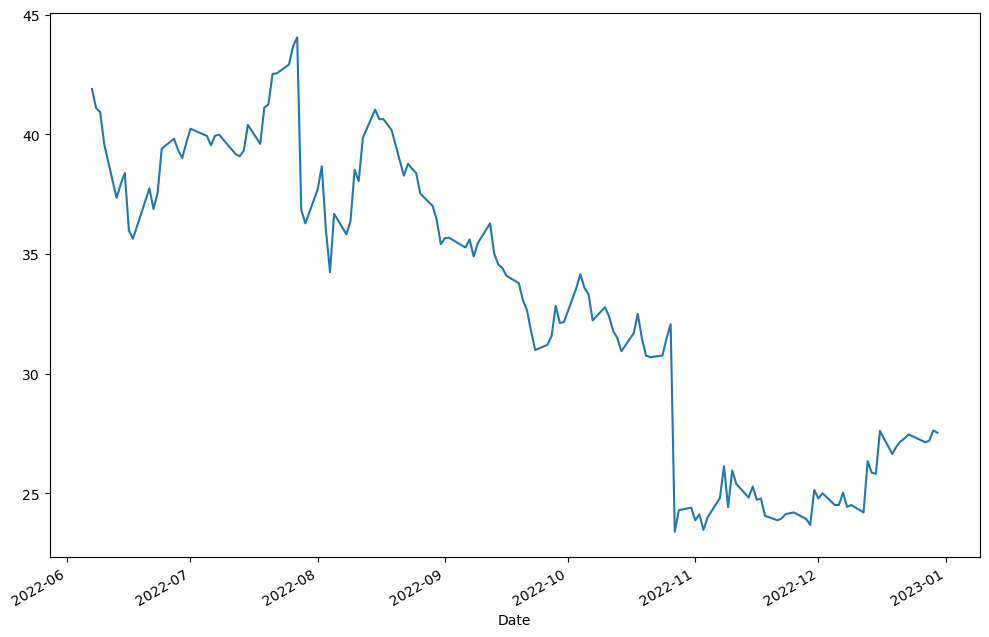

In [103]:
ms['Close'].loc['2022'].plot(figsize=(12,8))
plt.show()

In [104]:
price_increase_rate = (ms['Close'][0] - ms['Close'][-1])/ms['Close'][-1]
price_increase_rate

0.6037518145577409

In [105]:
total_year = ms.index[0].year - ms.index[-1].year
total_year

-1

In [106]:
annual_growth_rate = price_increase_rate**(1/total_year)
annual_growth_rate

1.6563097217894378

<AxesSubplot:xlabel='Date'>

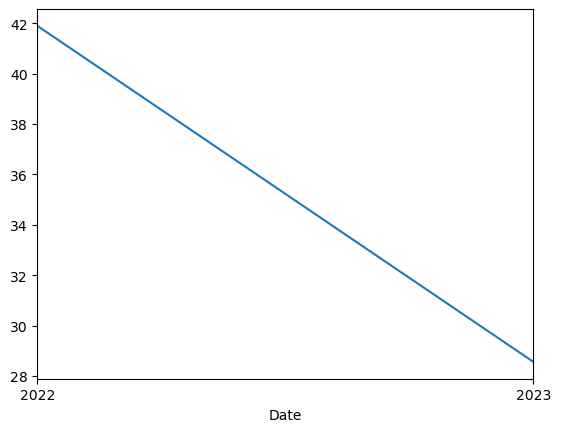

In [107]:
ms['Close'].to_period('A').groupby(level = 0).first().plot()

In [108]:
ms['42d'] = ms['Close'].rolling(window=42).mean()
ms['250d'] = ms['Close'].rolling(window=250).mean()

Diagram of 42days average, 250days average and real close price.
In the short run,close price would normally be decreasing when the 42days price is below 250days price.

<AxesSubplot:xlabel='Date'>

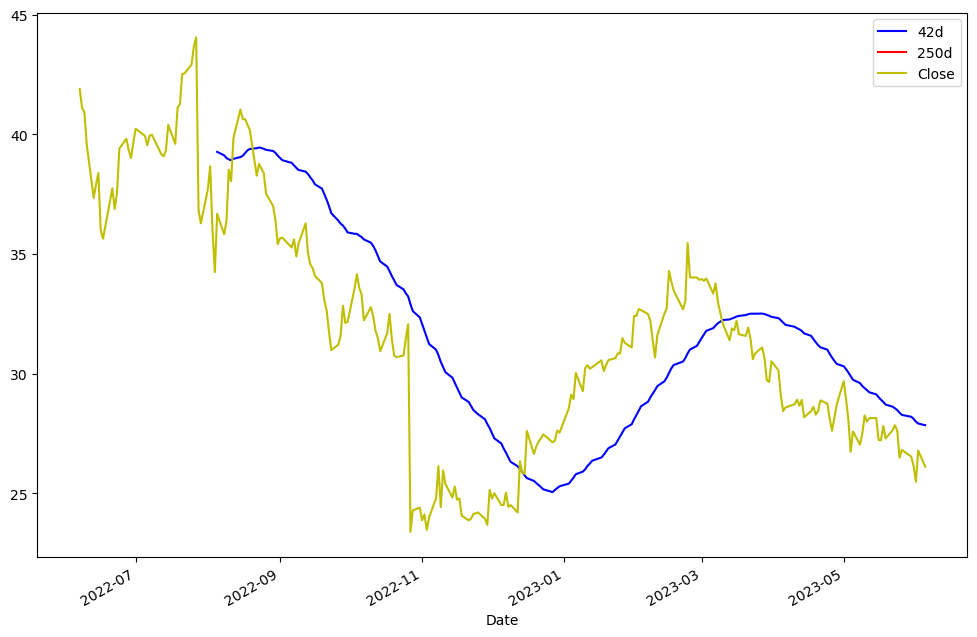

In [109]:
ms[['42d', '250d', 'Close']].plot(figsize=(12,8), color=['b', 'r', 'y'])

In [110]:
ms['log-returns'] = np.log(ms['Close']/ms['Close'].shift(1))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

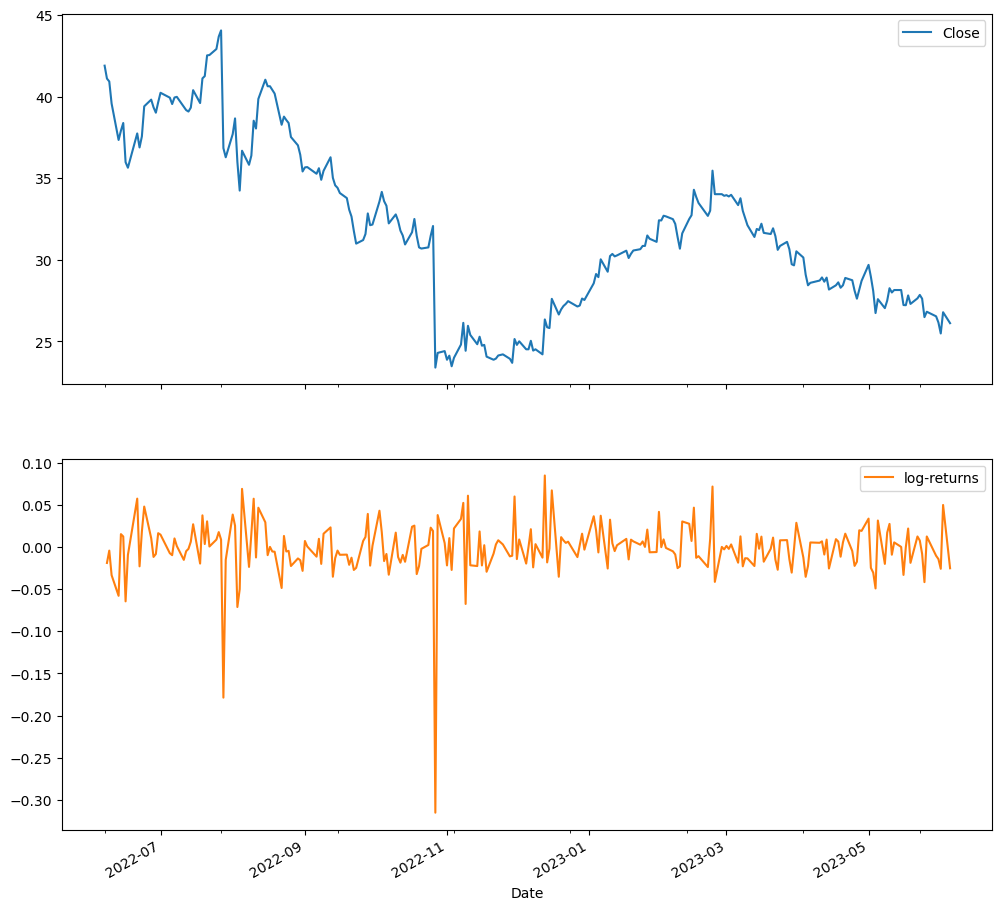

In [111]:
ms[['Close', 'log-returns']].plot(subplots=True, figsize=(12,12))

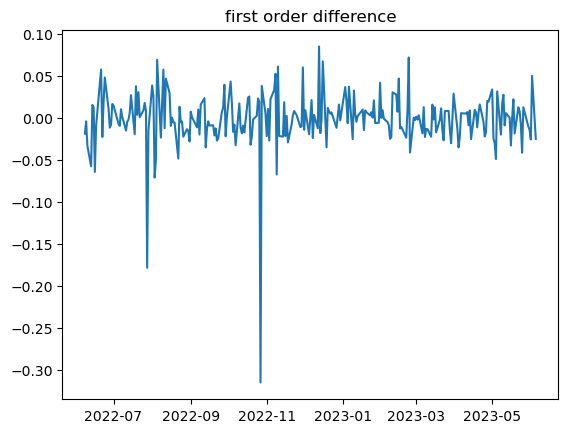

In [112]:
plt.figure()
plt.plot(ms['log-returns'])
plt.title('first order difference')
plt.show()

Using autocorrelation function and partial autocorrelation function to find the pattern of data.
From the diagram, we can get p = 0 abd q = 1.

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.(in this case d=1)
q: The size of the moving average window, also called the order of moving average.

C:\Users\Manjuprasad\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


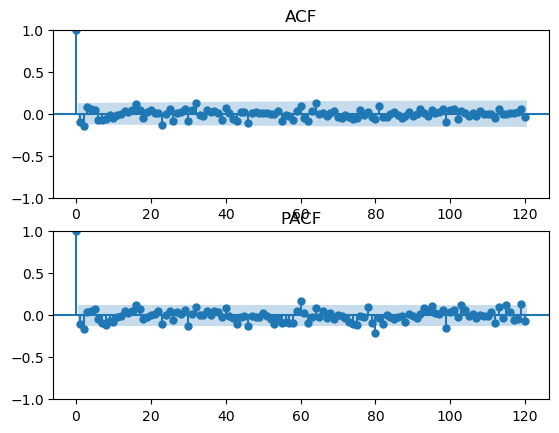

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have a DataFrame named 'ms' with a 'Close' column
# Calculate the differenced stock data
stock_diff = ms['Close'].diff().dropna()

# Create a new figure
fig = plt.figure()

# Add the first subplot for ACF
ax1 = fig.add_subplot(211)
plot_acf(stock_diff, lags=120, ax=ax1, title="ACF")

# Add the second subplot for PACF
ax2 = fig.add_subplot(212)
plot_pacf(stock_diff, lags=120, ax=ax2, title="PACF")

# Display the figure
plt.show()


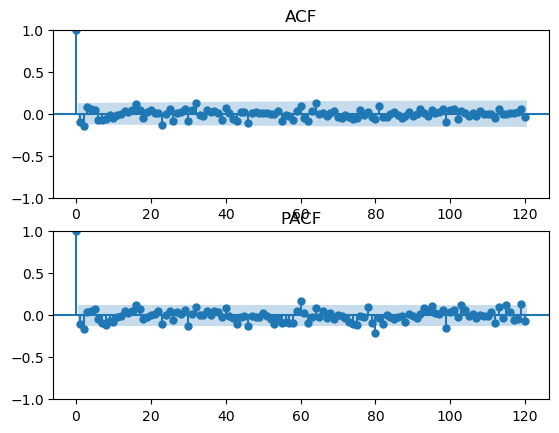

In [114]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plot_acf(stock_diff, lags=120,ax=ax1,title="ACF")
plot_pacf(stock_diff, lags=120,ax=ax2,title="PACF")
plt.show()

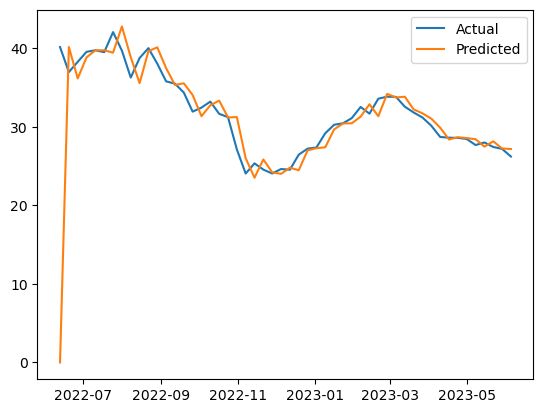

In [115]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming you have a DataFrame named 'stock_train' with the training data
# Convert the index to a datetime index with weekly frequency starting on Monday
stock_train.index = pd.to_datetime(stock_train.index)
stock_train = stock_train.asfreq('W-MON')

# Create a SARIMAX model
model = SARIMAX(stock_train, order=(0, 1, 1))

# Fit the model
model_fit = model.fit()

# Generate predictions
predictions = model_fit.predict()

# Plot the predictions
plt.plot(stock_train, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


In [116]:
# Assuming you have the 'result' object from fitting the ARIMA model
pred = result.predict(start='2022-09-26', end='2023-03-06', dynamic=True, typ='levels')
pred.head(50)


Date
2022-09-26    34.050643
2022-10-03    34.050643
2022-10-10    34.050643
2022-10-17    34.050643
2022-10-24    34.050643
2022-10-31    34.050643
2022-11-07    34.050643
2022-11-14    34.050643
2022-11-21    34.050643
2022-11-28    34.050643
2022-12-05    34.050643
2022-12-12    34.050643
2022-12-19    34.050643
2022-12-26    34.050643
2023-01-02    34.050643
2023-01-09    34.050643
2023-01-16    34.050643
2023-01-23    34.050643
2023-01-30    34.050643
2023-02-06    34.050643
2023-02-13    34.050643
2023-02-20    34.050643
2023-02-27    34.050643
2023-03-06    34.050643
Freq: W-MON, Name: predicted_mean, dtype: float64

# Diagram of prediction of stock close price.(yahoo.finance)

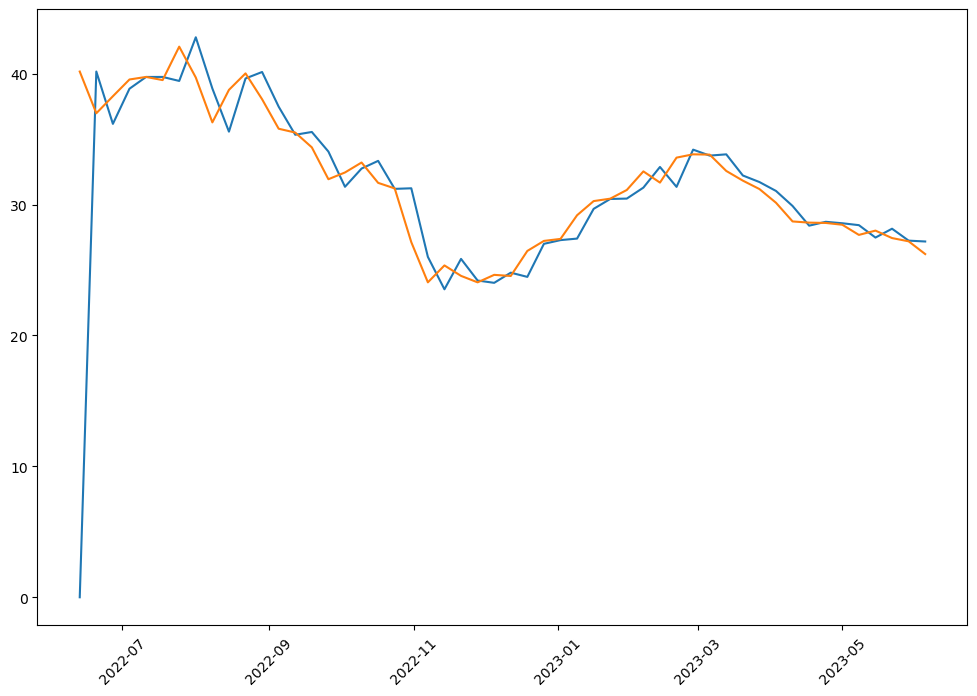

In [117]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
plt.plot(predictions)
plt.plot(stock_train)
plt.show()